In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from urllib.request import urlretrieve
from zipfile import ZipFile
from torchsummary import summary

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")
    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])
        print("Done")
    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
URL = r"https://www.dropbox.com/scl/fi/36utqtkyfg7piqczxlmb3/SkyFusion-YOLOv9.zip?rlkey=c1801ghd40kzs0uk8d4bnelhg&dl=1"
asset_zip_path = os.path.join(os.getcwd(), "Fine-Tuning-YOLOv9.zip")
download_and_unzip(URL, asset_zip_path)
model = YOLO('yolov9c.pt')

100%|██████████| 49.4M/49.4M [00:00<00:00, 242MB/s]


In [ ]:
model.info()

YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [ ]:
import shutil
import os

new_path = "/content/datasets/SkyFusion-YOLOv9"
os.makedirs(new_path, exist_ok=True)

dirs = ['train', 'test','valid']
for dir in dirs:
    current_path = f"/content/SkyFusion-YOLOv9/{dir}"
    # Create the new directory if it doesn't exist
    # Move the directory
    shutil.move(current_path, new_path)


In [ ]:
image = '/content/datasets/SkyFusion-YOLOv9/test/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.404d7479fb77a71470b8bc2fcf64f604.jpg'


image 1/1 /content/datasets/SkyFusion-YOLOv9/test/images/014de911-7810-4f7d-8967-3e5402209f4a_0_0_jpg.rf.404d7479fb77a71470b8bc2fcf64f604.jpg: 640x640 1 airplane, 2264.7ms
Speed: 2.6ms preprocess, 2264.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


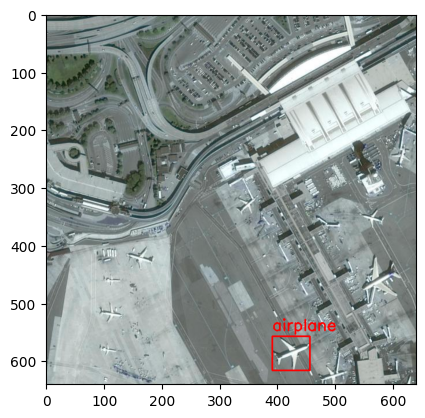

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def Predict(image, model):
    results = model.predict(source=image, imgsz=640)
    boxes = results[0].boxes.data
    boxes = boxes.numpy()
    boxes = boxes.astype(int)
    class_names = results[0].names
    img = results[0].orig_img
    for box in boxes:
        x1, y1, x2, y2, s, d = box
        label = class_names[d]
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        img = cv2.putText(img, f'{label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img)
    plt.show()

Predict(image, model)

In [ ]:
results = model.train(data='SkyFusion-YOLOv9/data.yaml', epochs=10, imgsz=640, freeze=10)#, lr0=0.01)

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=SkyFusion-YOLOv9/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 80.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 307MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/datasets/SkyFusion-YOLOv9/train/labels... 2094 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2094/2094 [00:02<00:00, 985.73it/s]


train: New cache created: /content/datasets/SkyFusion-YOLOv9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34879, len(boxes) = 43575. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/SkyFusion-YOLOv9/valid/labels... 449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 449/449 [00:00<00:00, 569.40it/s]

val: New cache created: /content/datasets/SkyFusion-YOLOv9/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6430, len(boxes) = 8387. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      11.8G      1.831      1.655      1.181        174        640: 100%|██████████| 131/131 [01:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]

                   all        449       8387      0.435      0.442      0.378      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      12.1G      1.766      1.064      1.154        237        640: 100%|██████████| 131/131 [01:15<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all        449       8387      0.226      0.483      0.163      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      11.5G      1.701     0.9801      1.114        156        640: 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        449       8387      0.512      0.478      0.442      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      10.9G      1.678     0.9319      1.098        383        640: 100%|██████████| 131/131 [01:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.45it/s]


                   all        449       8387      0.568      0.474      0.457      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      10.8G      1.667     0.8851      1.099         67        640: 100%|██████████| 131/131 [01:12<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]

                   all        449       8387      0.579      0.521       0.49      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      11.5G      1.595     0.8175      1.061         66        640: 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.50it/s]


                   all        449       8387      0.564      0.527      0.496      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      11.5G      1.558     0.7895      1.048        133        640: 100%|██████████| 131/131 [01:12<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]

                   all        449       8387      0.575       0.52      0.494      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      10.8G      1.551     0.7744      1.047        416        640: 100%|██████████| 131/131 [01:13<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.49it/s]

                   all        449       8387      0.568      0.526      0.511      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      11.3G      1.506     0.7371      1.028         41        640: 100%|██████████| 131/131 [01:12<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]

                   all        449       8387      0.601      0.548      0.527      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      13.2G       1.46     0.7075      1.013         82        640: 100%|██████████| 131/131 [01:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]

                   all        449       8387      0.582      0.557      0.532      0.302



10 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]


                   all        449       8387      0.582      0.558      0.532      0.302
              Aircraft        449       1957       0.93      0.945      0.953      0.682
                  ship        449        288      0.465      0.354      0.351      0.134
               vehicle        449       6142      0.349      0.374      0.292       0.09
Speed: 0.4ms preprocess, 15.6ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.save('yolov9cft.pt')